# Objective: 
* Explore the dataset and extract actionable insights on car prices
* Generate summary from the dataset about car variables

# Data:
**CarPricesPrediction.csv** - It contains information about cars.

* Make - Make of the car
* Model - Model of the car
* Year - Year of manufactur of the car
* Mileage - Mileage of the car
* Condition - Condition of the car
* Price - Price of the car

### Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read the dataset

In [2]:
cardata=pd.read_csv("CarPricesPrediction.csv")
# read the dataset into a dataframe called cardata

### Check the data types of the columns for the dataset.

In [3]:
cardata.info()
# provides information about data types in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Make        1000 non-null   object 
 2   Model       1000 non-null   object 
 3   Year        1000 non-null   int64  
 4   Mileage     1000 non-null   int64  
 5   Condition   1000 non-null   object 
 6   Price       1000 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


### View the first and last 5 rows of the dataset.

In [4]:
cardata.head()
# check the first five entries in the dataset

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [5]:
cardata.tail()
# check the last five entries in the dataset

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
995,995,Nissan,Camry,2010,149032,Excellent,24548.50
996,996,Chevrolet,F-150,2014,20608,Excellent,26969.70
997,997,Ford,Altima,2016,109851,Good,20507.55
998,998,Toyota,Silverado,2010,11704,Good,31414.90
999,999,Nissan,Silverado,2017,128390,Excellent,18580.60


### Checking for missing values

In [6]:
cardata.isnull().sum()
# check if there are any null values.

Unnamed: 0    0
Make          0
Model         0
Year          0
Mileage       0
Condition     0
Price         0
dtype: int64

### Understand the shape of the dataset.

In [7]:
cardata.shape
# check the dataset shape

(1000, 7)

* Dataset has 1000 rows and 7 columns.

### Give a statistical summary for the dataset.

In [8]:
cardata.describe()
# provides a statistical summary of the dataset

,Unnamed: 0,Year,Mileage,Price
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,499.500000,2015.86500,78796.927000,22195.205650
std,288.819436,3.78247,39842.259941,4245.191585
min,0.000000,2010.00000,10079.000000,12613.000000
25%,249.750000,2013.00000,44942.750000,18961.862500
50%,499.500000,2016.00000,78056.500000,22247.875000
75%,749.250000,2019.00000,112366.250000,25510.275000
max,999.000000,2022.00000,149794.000000,31414.900000


Notes
* Minimum Year = 2010 & Maximum Year = 2022
* Minimum Mileage = 10,079 & Maximum Mileage = 149,794
* Minimum Price = 12,613 & Maximum Price = 31,414

In [9]:
cardata.describe(include=["object"])
# provides a statistical summary of the objects in the dataset

,Make,Model,Condition
count,1000,1000,1000
unique,5,5,3
top,Chevrolet,Altima,Excellent
freq,209,226,595


In [10]:
cardata['Make'].value_counts().sort_values(ascending=False)
# count number of makes of cars and sort in ascending order

Make
Chevrolet    209
Toyota       205
Ford         199
Honda        199
Nissan       188
Name: count, dtype: int64

### Graphs of the variables in the dataset

<Axes: xlabel='Make'>

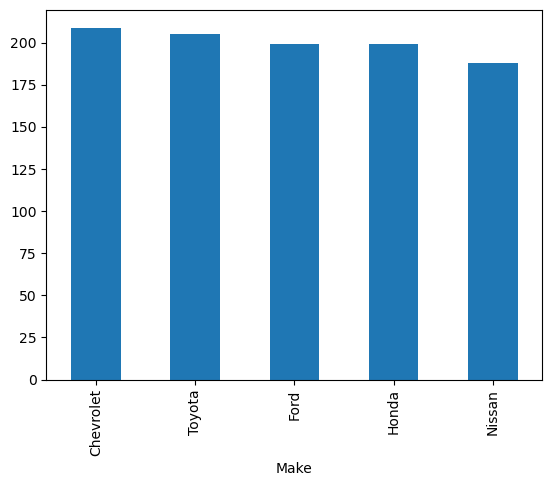

In [11]:
cardata['Make'].value_counts().plot(kind='bar')

Notes
* Chevrolet is the highest number and Nissan is the lowest number in the dataset

<Axes: xlabel='Model'>

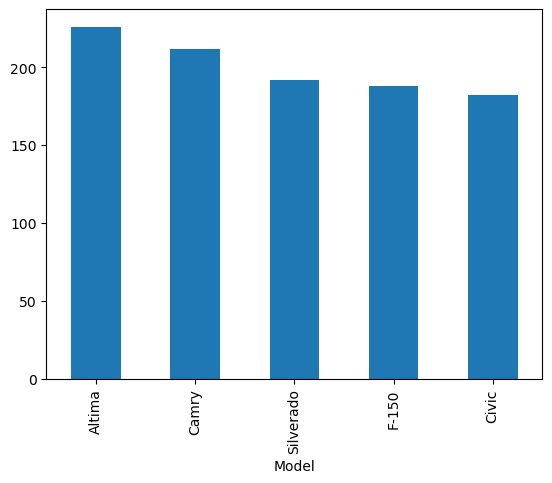

In [12]:
cardata['Model'].value_counts().plot(kind='bar')

Notes
* Altima  is the highest number in terms of mdoels while Civic is the lowest number.

<Axes: xlabel='Condition'>

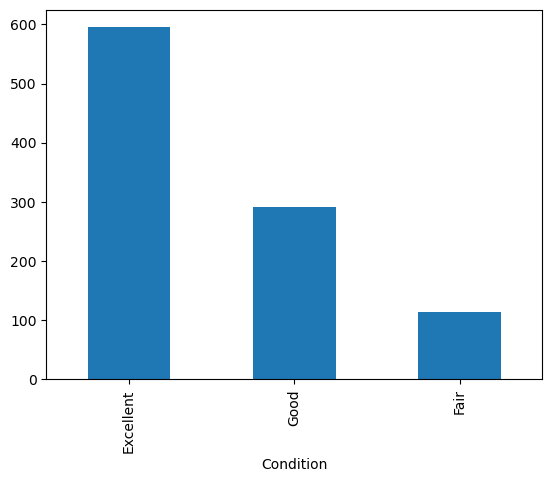

In [13]:
cardata['Condition'].value_counts().plot(kind='bar')

Notes
* The most common condition of the cars is "Excellent"

In [14]:
pd.crosstab(cardata['Model'],cardata['Make'])

Make,Chevrolet,Ford,Honda,Nissan,Toyota
Model,,,,,
Altima,50,38,40,46,52
Camry,41,48,40,40,43
Civic,38,38,37,31,38
F-150,46,39,31,35,37
Silverado,34,36,51,36,35


In [15]:
pd.crosstab(cardata['Make'],cardata['Condition'])

Condition,Excellent,Fair,Good
Make,,,
Chevrolet,120,20,69
Ford,120,22,57
Honda,118,26,55
Nissan,111,20,57
Toyota,126,25,54


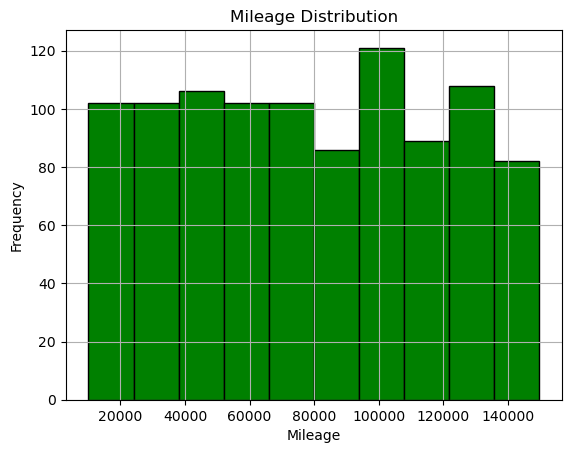

In [25]:
plt.hist(cardata['Mileage'], bins=10, color='green', edgecolor='black')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Mileage Distribution')
plt.grid(True)
plt.show()

In [17]:
# Calculate average car price by Make
average_price_by_make = cardata.groupby('Make')['Price'].mean()

# Sort by average price in descending order
average_price_by_make = average_price_by_make.sort_values(ascending=False)

print("Average car price by make (highest to lowest):")
print(average_price_by_make)

Average car price by make (highest to lowest):
Make
Nissan       22587.502128
Ford         22354.415578
Honda        22238.084171
Chevrolet    21957.203589
Toyota       21881.913415
Name: Price, dtype: float64


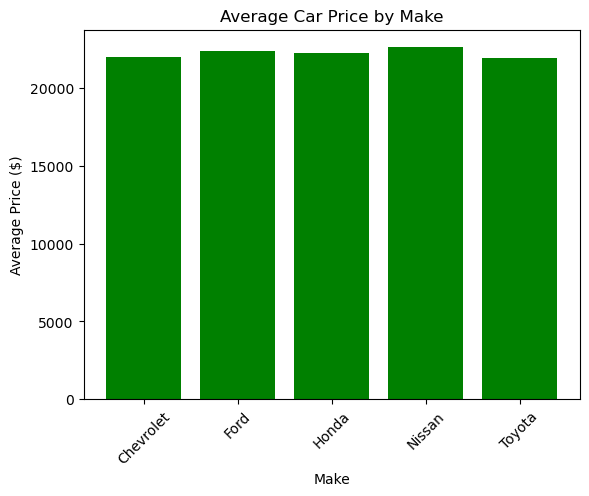

In [18]:
average_price_by_make = cardata.groupby('Make')['Price'].mean()
plt.bar(average_price_by_make.index, average_price_by_make.values, color='g')
plt.xlabel('Make')
plt.ylabel('Average Price ($)')
plt.title('Average Car Price by Make')
plt.xticks(rotation=45)
plt.show()


### Notes
* Nissan has the highest average car price
* Toyota has the lowest average car price

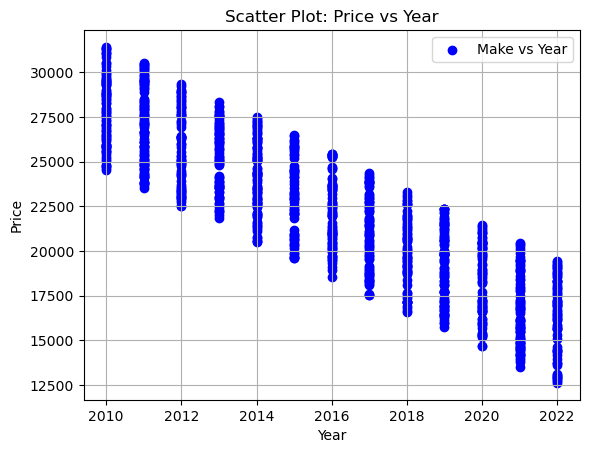

In [19]:
# Create the scatter plot
plt.scatter(cardata['Year'], cardata['Price'], marker='o', color='b', label='Make vs Year')
plt.title('Scatter Plot: Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

### Notes
* The higher the car year, the lower the car price

In [20]:
# Calculate the minimum, average, and maximum car prices
min_price = cardata['Price'].min()
average_price = cardata['Price'].mean()
max_price = cardata['Price'].max()

print(f"Minimum car price: ${min_price:.2f}")
print(f"Average car price: ${average_price:.2f}")
print(f"Maximum car price: ${max_price:.2f}")


Minimum car price: $12613.00
Average car price: $22195.21
Maximum car price: $31414.90


### Notes
Below are the car price distribution
* Minimum car price: $12613.00
  
* Average car price: $22195.21
  
* Maximum car price: $31414.90

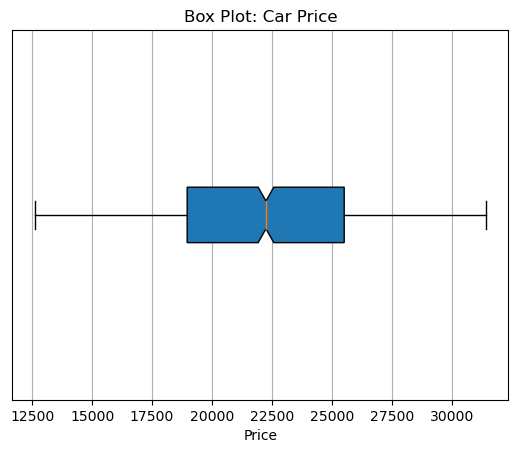

In [21]:
# Create the box plot
plt.boxplot(cardata['Price'], vert=False, notch=True, patch_artist=True)
plt.title("Box Plot: Car Price")
plt.xlabel("Price")
plt.yticks([])  # Hide y-axis ticks
plt.grid(axis='x')
plt.show()

### Notes
* The graph shows the distribution of car prices

In [22]:
cardata.drop(columns=['Make', 'Model', 'Condition'],inplace=True)

In [23]:
cardata.corr()

,Unnamed: 0,Year,Mileage,Price
Unnamed: 0,1.000000,-0.030332,0.034805,0.010693
Year,-0.030332,1.000000,-0.016850,-0.883093
Mileage,0.034805,-0.016850,1.000000,-0.454250
Price,0.010693,-0.883093,-0.454250,1.000000


### Notes
#### 1. Year vs. Mileage:
#### The correlation coefficient is approximately -0.02.
#### This suggests a very weak negative correlation between the year of the car and its mileage.
#### As the year of the car increases, the mileage tends to slightly decrease (but the effect is minimal).

#### 2. Year vs. Price:
#### The correlation coefficient is approximately -0.88.
#### This indicates a strong negative correlation between the year of the car and its price.
#### Newer cars tend to have higher prices.

#### 3. Mileage vs. Price:
#### The correlation coefficient is approximately -0.45.
#### This shows a moderate negative correlation between the mileage of the car and its price.
#### As the mileage increases, the price tends to decrease.